# Times and places

Elements of Data Science

by [Allen Downey](https://allendowney.com)

[MIT License](https://opensource.org/licenses/MIT)

## Strings

A **string** is a sequence of letters, numbers, and punctuation marks.

In Python you can create a string by typing letters between single or double quotation marks.

In [1]:
'Data'

'Data'

In [2]:
"Science"

'Science'

And you can assign string values to variables.

In [3]:
first = 'Data'

In [4]:
last = "Science"

Some arithmetic operators work with strings, but they might no do what you expect.  For example, the `+` operator "concatenates" two strings; that is, it creates a new string that contains the first string followed by the second string:

In [5]:
first + last

'DataScience'

Strings are used to store text data like names, addresses, titles, etc.

When you read data from a file, you might see values that look like numbers, but they are actually strings, like this:

In [6]:
not_actually_a_number = '123'

If you try to do math with these strings, you might get an error:

In [7]:
not_actually_a_number + 1

TypeError: can only concatenate str (not "int") to str

Or you might get a surprising result:

In [8]:
not_actually_a_number + '1'

'1231'

Fortunately, you can convert strings to numbers.

If you have a string that contains only digits, you can convert it to an integer using the `int` function:

In [9]:
int('123')

123

Or you can convert it to a floating-point number using `float`:

In [10]:
float('123')

123.0

But if the string contains a decimal point, you can't convert it to an `int`:

In [11]:
int('12.3')

ValueError: invalid literal for int() with base 10: '12.3'

Going in the other direction, you can convert almost any type of value to a string using `str`:

In [12]:
str(123)

'123'

In [13]:
str(12.3)

'12.3'

## Dates and times

If you read data from a file, you might also find that dates and times are represented with strings.

In [14]:
not_really_a_date = 'May 11, 1967'

In [15]:
type(not_really_a_date)

str

In [16]:
not_really_a_time = '6:30:00'

In [17]:
type(not_really_a_time)

str

These strings provide a human-readable representation, but they are not useful for doing computation.

Fortunately, Python provides tools for working with date and time data.  Specifically, the Pandas library provides `Timestamp`, which represents a date and time.

In [18]:
import pandas as pd

Here's how to can convert a string to a `Timestamp`:

In [19]:
pd.Timestamp('6:30:00')

Timestamp('2019-10-10 06:30:00')

If the string specifies a time, Pandas fills in today's date.

A `Timestamp` is a value, so you can assign it to a variable.

In [20]:
date_of_birth = pd.Timestamp('June 4, 1989')
date_of_birth

Timestamp('1989-06-04 00:00:00')

If the string specifies a data, Pandas fills in midnight as the default time.

If you have a `Timestamp`, you can get the year, month, and day, like this:

In [21]:
date_of_birth.year, date_of_birth.month, date_of_birth.day

(1989, 6, 4)

You can also gets the name of the month and the day of the week.

In [22]:
date_of_birth.day_name(), date_of_birth.month_name()

('Sunday', 'June')

`Timestamp` provides a function called `now` that returns the current date and time.

In [23]:
now = pd.Timestamp.now()
now

Timestamp('2019-10-10 11:52:07.379486')

`Timestamp` values support some arithmetic operations.  For example, you can compute the difference between two `Timestamps`:

In [24]:
age = now - date_of_birth
age

Timedelta('11085 days 11:52:07.379486')

The result is a `Timedelta` that represents the current age of someone born on `date_of_birth`.

The `Timedelta` contains `components` that store the number of days, hours, etc. between the two `Timestamp` values.

In [25]:
age.components

Components(days=11085, hours=11, minutes=52, seconds=7, milliseconds=379, microseconds=486, nanoseconds=0)

You can get one of the components like this:

In [26]:
age.days

11085

The biggest component of `Timedelta` is days, not years, because days are well defined and years are problematic.

Most years are 365 days, but some are 366.  The average calendar year is 365.24 days, which is a very good approximation of a solar year, [but it is not exact](https://pumas.jpl.nasa.gov/files/04_21_97_1.pdf).

One way to compute age in years is to divide age in days by 365.24:

In [27]:
age.days / 365.24

30.349906910524584

But people usually report their ages in integer years.  We can use the Numpy `floor` function to round down:

In [28]:
import numpy as np

np.floor(age.days / 365.24)

30.0

Or the `ceil` function (which stands for "ceiling") to round up:

In [29]:
np.ceil(age.days / 365.24)

31.0

We can also compare `Timestamp` values to see which comes first.

For example, let's see if a person with a given birthdate has already had a birthday this year.

We can create a new `Timestamp` with the year from `now` and the month and day from `date_of_birth`.

In [30]:
bday_this_year = pd.Timestamp(now.year, date_of_birth.month, date_of_birth.day)
bday_this_year

Timestamp('2019-06-04 00:00:00')

The result represents the person's birthday this year.  Now we can use the `>` operator to check whether `now` is later than the birthday:

In [31]:
now > bday_this_year

True

The result is either `True` or `False`, which are special values in Python used to represent results from this kind of comparison.

These values belong to a type called `bool`, short for "Boolean algebra", which is a branch of algebra where all values are either true or false. 

In [32]:
type(True)

bool

In [33]:
type(False)

bool

**Exercise:** Any two people with different birthdays have a "Double Day" when one is twice as old as the other.

Suppose you are given two `Timestamp` values, `d1` and `d2`, that represent birthdays for two people.  Compute their double day.

Hint: if `x` is the unknown double day, we can write:

$(x - d_1) = 2 (x - d_2)$

If we solve for `x`, we get

$x = 2 d_2 - d_1$

But if you try to compute that, you will get an error, because you cannot multiply a `Timestamp` by 2.

However, you can compute the double day using `Timestamp` and `Timedelta` values; you just have to express it a different way.

Here are two example dates; with these dates, the result should be December 19, 2009.

In [34]:
d1 = pd.Timestamp('2003-07-12')

In [35]:
d2 = pd.Timestamp('2006-09-30')

In [36]:
# Solution

d2 + (d2 - d1)

Timestamp('2009-12-19 00:00:00')

## Location

There are many ways to represent geographical locations, but the most common, at least for global data, is latitude and longitude.

When stored as strings, latitude and longitude are expressed in degrees with compass directions N, S, E, and W.  For example, this string represents the location of Boston, MA, USA:

In [37]:
lat_lon_string = '42.3601° N, 71.0589° W'

When we compute with location information, we use floating-point numbers, with 

* Positive latitude for the northern hemisphere, negative latitude for the southern hemisphere, and 

* Positive longitude for the eastern hemisphere and negative latitude for the western hemisphere.

Of course, the choice of the origin, and the orientation of positive and negative, are arbitrary choices that were made for historical reasons.  We might not be able to chance conventions like these, but we should be aware that they are conventions.

Here's how we might represent the location of Boston with two variables.

In [38]:
lat = 42.3601
lon = -71.0589

It is also possible to combine two numbers into a composite value and assign it to a single variable:

In [39]:
boston = lat, lon

The type of this variable is `tuple`, which is a mathematical term for a value that contains a sequence of elements.  Math people pronounce it "tuh' ple", but computational people usually say "too' ple".  Take your pick.

In [40]:
type(boston)

tuple

If you have a tuple with two elements, you can assign them to two variables, like this:

In [41]:
y, x = boston
y

42.3601

In [42]:
x

-71.0589

Notice that I assigned latitude to `y` and longitude to `x`, because a `y` coordinate usually goes up and down like latitude, and an `x` coordinate usually goes side-to-side like longitude.

If you are given two tuples that represent locations, you can compute the approximate distance between them, along the surface of the globe, using the haversine function.

If you are curious about it, [you can read an explanation in this article](https://janakiev.com/blog/gps-points-distance-python/).

The following functions compute the Haversine distance between two locations.

In [43]:
import numpy as np

def hav(theta):
    """Computer the haversine function of theta."""
    return np.sin(theta/2)**2

def haversine(coord1, coord2):
    """Haversine distance between two locations.
    
    coord1: lat-lon as tuple of float 
    coord2: lat-lon as tuple of float
    
    returns: distance in km
    """
    R = 6372.8  # Earth radius in km
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    
    phi1, phi2 = np.radians(lat1), np.radians(lat2) 
    dphi       = np.radians(lat2 - lat1)
    dlambda    = np.radians(lon2 - lon1)
    
    a = hav(dphi) + np.cos(phi1)*np.cos(phi2)*hav(dlambda)
    
    distance = 2*R*np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    return distance

Here's the location of London, England, UK:

In [44]:
london = 51.5074, -0.1278

And here's the haversine distance between Boston and London.

In [45]:
haversine(boston, london)

5265.656325981015

The actual geographic distance is slightly different because Earth is not a perfect sphere.  But the error of this estimate is less than 1%.

## Geopandas

Python provides libraries for working with geographical data.  One of the most popular is Geopandas, which is based on another library called Shapely.  I'll introduce these libraries here, and we'll come back to them later.

Shapely provides `Point` and `LineString` values, which we'll use to represent geographic locations and lines between locations.

In [46]:
from shapely.geometry import Point, LineString

We can use the tuples we defined in the previous section to create Shapely `Point` values, but we have to reverse the order of the coordinates, providing them in x-y order rather than lat-lon order.

In [47]:
p1 = Point(reversed(boston))
p2 = Point(reversed(london))

If we display both values, we get a string representation:

In [48]:
p1, p2

(<shapely.geometry.point.Point at 0x7f676276dd90>,
 <shapely.geometry.point.Point at 0x7f676276ddd0>)

If we display one `Point` value, we get a graphical representation, but not a very useful one.

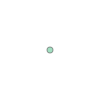

In [49]:
p1

We can use the points we just defined to create a `LineString`:

In [50]:
ls = LineString([p1, p2])

If we display the result, we get another not very useful graphical representation.

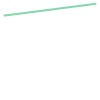

In [51]:
ls

However, now we can use Geopandas to show these points and lines on a map.

If you are running this notebook on Colab, the following cell will install Geopandas, which should only take a few seconds.

In [56]:
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install geopandas

Now the following import statement should work.

In [57]:
import geopandas as gpd

The following code loads a map of the world and plots it.

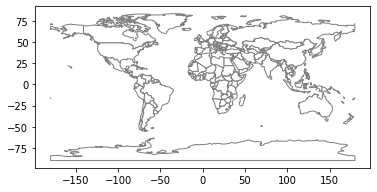

In [58]:
path = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(path)
world.plot(color='white', edgecolor='gray');

Here's a version that just plots North America and Europe:

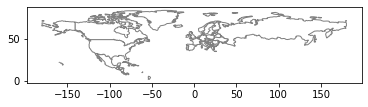

In [59]:
north_america = world.continent == 'North America'
europe = world.continent == 'Europe'
north_america = world[north_america | europe]
north_america.plot(color='white', edgecolor='gray')

Notice:

* By default, Geopandas uses the political definition of "Europe", which includes the parts of Russia that is on the Asian continent.

* It also uses a Mercator projection, which provides a misleading picture of relative land areas.

You can't make a map without making visualization decisions.

Finally, here's code that plots North America and Europe, then adds dots for Boston and London, and a line between them.

It uses a function from Matplotlib, which is a visualization library we will use extensively.

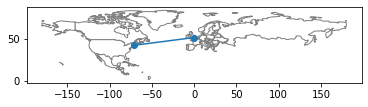

In [60]:
import matplotlib.pyplot as plt

north_america.plot(color='white', edgecolor='gray')
ax = plt.gca()

# plot Boston and London
points = p1, p2
gpd.plotting.plot_point_collection(ax, points)

# plot the line between them
lines = ls,
gpd.plotting.plot_linestring_collection(ax, lines);

There are a few features in this example we have not explained completely, but hopefully you get the idea.  We will come back to Geopandas later.

**Exercise:** Find the latitude and logitude of the place you were born, or some place you think of as your "home town".

Modify the code in the previous section to plot a point that shows your chosen location, and a line from your location to Boston.

Then go to [this online survey](https://forms.gle/RJva9c3JhAUL3THS6) and answer the questions there.  We will use your responses for an upcoming example.